In [1]:
cd /content/drive/MyDrive/CURSOS/EOI/Python-Developer-EOI/module3/examen/

/content/drive/MyDrive/CURSOS/EOI/Python-Developer-EOI/module3/examen


In [2]:
!pwd

/content/drive/MyDrive/CURSOS/EOI/Python-Developer-EOI/module3/examen


In [3]:
!ls -l

total 7588
-rw------- 1 root root 7077973 Oct 27  2019 AB_NYC_2019.csv
-rw------- 1 root root  499114 Nov 30 16:28 examen-modulo3-airbnb.ipynb
-rw------- 1 root root  192340 Nov 30 12:08 New_York_City_.png


In [4]:
filename = 'AB_NYC_2019.csv'

In [76]:
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats

%matplotlib inline

In [6]:
dfa = pd.read_csv(filename)

In [79]:
dfa.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [80]:
# Busco valores nulos que puedan perjudicar mi análisis
d.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
dfa.shape

(48895, 16)

In [10]:
dfa.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [11]:
dfa.calculated_host_listings_count.unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [12]:
dfa.drop(['name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

In [13]:
dfa.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [14]:
dfa.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

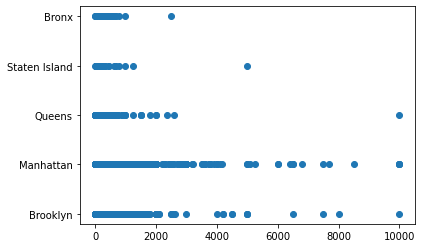

In [15]:
plt.scatter(dfa.price, dfa.neighbourhood_group)

In [16]:
dfa.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [18]:
dfa.groupby('neighbourhood_group').mean()['price']

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

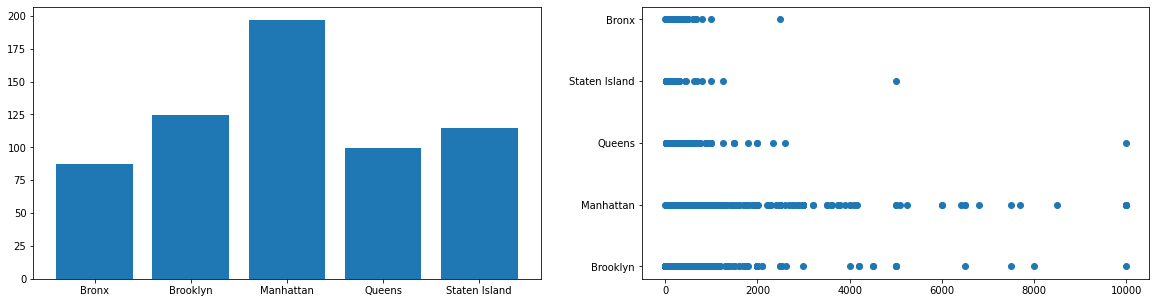

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.bar(sorted(dfa.neighbourhood_group.unique()), dfa.groupby('neighbourhood_group').mean()['price'])
ax2.scatter(dfa.price, dfa.neighbourhood_group)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


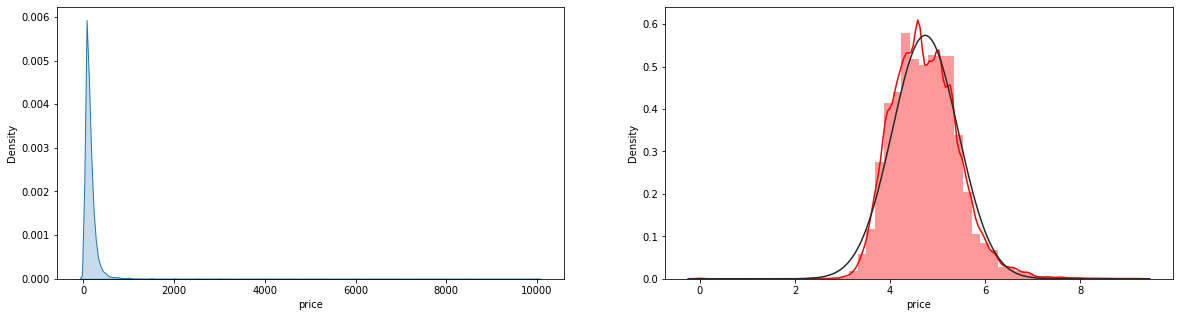

In [73]:
# Distribución de precios
f, axes = plt.subplots(1, 2, figsize=(20,5))

sns.kdeplot(dfa.price, shade=True, ax=axes[0])
sns.distplot(np.log1p(dfa['price']), fit=norm, ax=axes[1], color='r')

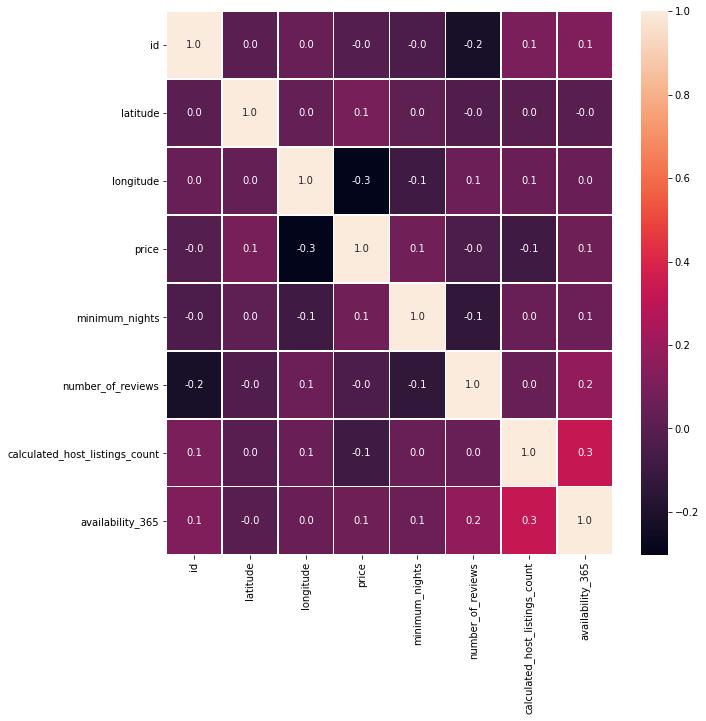

In [26]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfa.corr(method='kendall'), annot=True, linewidths=.5, fmt= '.1f')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


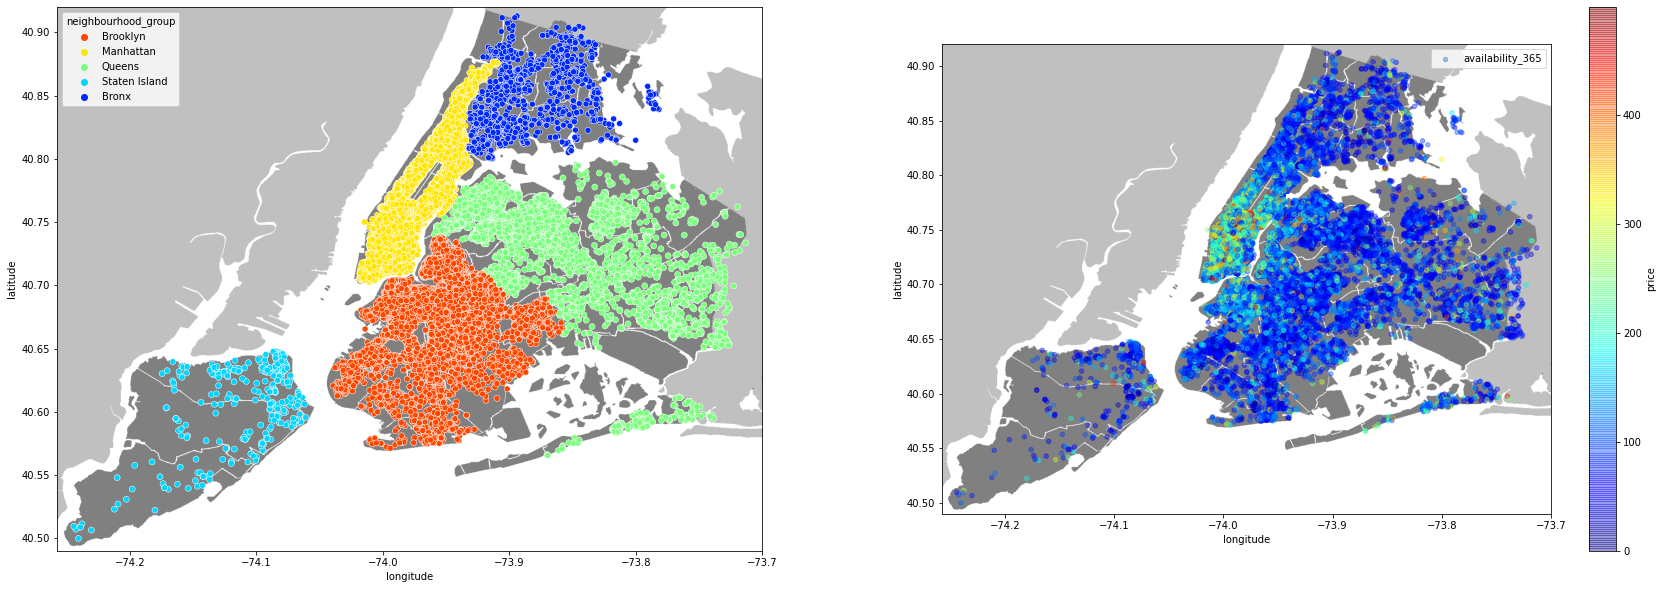

In [67]:
f, axes = plt.subplots(1, 2, figsize=(30,10))

# plt.figure(figsize=(10,8))

# Loading the png NYC image found on Google and saving to my local folder along with the project
i= urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)

axes[0].imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(dfa.longitude, dfa.latitude, hue=dfa.neighbourhood_group, palette='jet_r', ax=axes[0], zorder=1)

# Scaling the image based on the latitude and longitude max and mins for proper output
axes[1].imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
dfa[dfa.price < 500].plot(kind='scatter', x='longitude', y='latitude',
                          label='availability_365', c='price',
                          ax=axes[1],
                          cmap=plt.get_cmap('jet'),
                          colorbar=True,
                          alpha=0.4,
                          zorder=1)

plt.legend()
plt.show()

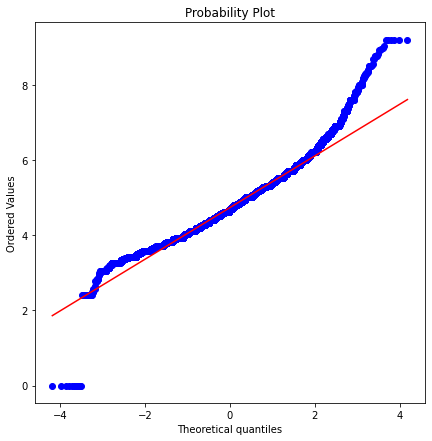

In [77]:
plt.figure(figsize=(7,7))
stats.probplot(np.log1p(dfa['price']), plot=plt)
plt.show()

In [78]:
dfmodel = dfa.drop(columns=[''])

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2
